In [2]:
import os
import numpy as np
from sklearn.utils import shuffle
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import networkx as nx




from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2

from spektral.layers import GCNConv
from spektral.data import Dataset
from spektral.data.graph import Graph
import os
import random as rand
from random import randint
from numpy.random import rand,randint
import numpy as np
from spektral.transforms import LayerPreprocess
from sklearn.model_selection import train_test_split
import pandas as pd
from spektral.data.loaders import SingleLoader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
data_dir='/Users/abishek/Desktop/Abishek/graph_ml/data/'

In [4]:
#loading the data

all_data = []
all_edges = []

for root,dirs,files in os.walk(data_dir+'cora'):
    for file in files:
        if '.content' in file:
            with open(os.path.join(root,file),'r') as f:
                all_data.extend(f.read().splitlines())
        elif 'cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Shuffle the data because the raw data is ordered based on the label
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

In [5]:
all_data

['7430\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\

In [11]:
all_edges

['35\t1033',
 '35\t103482',
 '35\t103515',
 '35\t1050679',
 '35\t1103960',
 '35\t1103985',
 '35\t1109199',
 '35\t1112911',
 '35\t1113438',
 '35\t1113831',
 '35\t1114331',
 '35\t1117476',
 '35\t1119505',
 '35\t1119708',
 '35\t1120431',
 '35\t1123756',
 '35\t1125386',
 '35\t1127430',
 '35\t1127913',
 '35\t1128204',
 '35\t1128227',
 '35\t1128314',
 '35\t1128453',
 '35\t1128945',
 '35\t1128959',
 '35\t1128985',
 '35\t1129018',
 '35\t1129027',
 '35\t1129573',
 '35\t1129683',
 '35\t1129778',
 '35\t1130847',
 '35\t1130856',
 '35\t1131116',
 '35\t1131360',
 '35\t1131557',
 '35\t1131752',
 '35\t1133196',
 '35\t1133338',
 '35\t1136814',
 '35\t1137466',
 '35\t1152421',
 '35\t1152508',
 '35\t1153065',
 '35\t1153280',
 '35\t1153577',
 '35\t1153853',
 '35\t1153943',
 '35\t1154176',
 '35\t1154459',
 '35\t116552',
 '35\t12576',
 '35\t128540',
 '35\t132806',
 '35\t135130',
 '35\t141342',
 '35\t141347',
 '35\t148170',
 '35\t15670',
 '35\t1688',
 '35\t175291',
 '35\t178727',
 '35\t18582',
 '35\t190697',


In [7]:
#parse the data
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#parse the edge
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))

print('\nNumber of nodes (N): ', N)
print('\nNumber of features (F) of each node: ', F)
print('\nCategories: ', set(labels))

num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

X shape:  (2708, 1433)

Number of nodes (N):  2708

Number of features (F) of each node:  1433

Categories:  {'Probabilistic_Methods', 'Rule_Learning', 'Genetic_Algorithms', 'Theory', 'Neural_Networks', 'Case_Based', 'Reinforcement_Learning'}

Number of classes:  7


In [8]:
edge_list

[('35', '1033'),
 ('35', '103482'),
 ('35', '103515'),
 ('35', '1050679'),
 ('35', '1103960'),
 ('35', '1103985'),
 ('35', '1109199'),
 ('35', '1112911'),
 ('35', '1113438'),
 ('35', '1113831'),
 ('35', '1114331'),
 ('35', '1117476'),
 ('35', '1119505'),
 ('35', '1119708'),
 ('35', '1120431'),
 ('35', '1123756'),
 ('35', '1125386'),
 ('35', '1127430'),
 ('35', '1127913'),
 ('35', '1128204'),
 ('35', '1128227'),
 ('35', '1128314'),
 ('35', '1128453'),
 ('35', '1128945'),
 ('35', '1128959'),
 ('35', '1128985'),
 ('35', '1129018'),
 ('35', '1129027'),
 ('35', '1129573'),
 ('35', '1129683'),
 ('35', '1129778'),
 ('35', '1130847'),
 ('35', '1130856'),
 ('35', '1131116'),
 ('35', '1131360'),
 ('35', '1131557'),
 ('35', '1131752'),
 ('35', '1133196'),
 ('35', '1133338'),
 ('35', '1136814'),
 ('35', '1137466'),
 ('35', '1152421'),
 ('35', '1152508'),
 ('35', '1153065'),
 ('35', '1153280'),
 ('35', '1153577'),
 ('35', '1153853'),
 ('35', '1153943'),
 ('35', '1154176'),
 ('35', '1154459'),
 ('35

In [10]:
def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

In [9]:
labels

['Reinforcement_Learning',
 'Probabilistic_Methods',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Neural_Networks',
 'Reinforcement_Learning',
 'Case_Based',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Neural_Networks',
 'Theory',
 'Reinforcement_Learning',
 'Theory',
 'Neural_Networks',
 'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Rule_Learning',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Genetic_Algorithms',
 'Theory',
 'Case_Based',
 'Rule_Learning',
 'Neural_Networks',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Neural_Networks',
 'Neural_Networks',
 'Genetic_Algorithms',
 'Reinforcement_Learning',
 'Case_Based',
 'Theory',
 'Probabilistic_Methods',
 'Probabilistic_Methods',
 'Rule_Learning',
 'Genetic_Algorithms',
 'Genetic_Algorithms',
 'Theory',
 'Genetic_Algorithms',
 'Case_Based',
 'Theory',
 'Theory',
 'Neural_Networks',
 'Rule_Learning',
 'Rule_Learni

In [12]:
labels_encoded,classes

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32),
 array(['Case_Based', 'Genetic_Algorithms', 'Neural_Networks',
        'Probabilistic_Methods', 'Reinforcement_Learning', 'Rule_Learning',
        'Theory'], dtype='<U22'))

In [13]:
#build the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)
# print('Graph info: ', nx.info(G))

In [15]:
print(X.shape)
print(A.shape)
print(labels_encoded.shape)

(2708, 1433)
(2708, 2708)
(2708, 7)


In [17]:
class CustomCoraDataset(Dataset):
    def __init__(self, nodes, feats,labels,**kwargs):
        self.nodes = nodes
        self.feats = feats
        self.labels=labels
        super().__init__(**kwargs)

    def read(self):
        # We must return a list of Graph objects
        output = []
        output.append(Graph(x=self.nodes, a=self.feats, y=self.labels))


        return output

In [18]:
dataset=CustomCoraDataset(X,A,labels_encoded)

In [19]:
## To create dataset with transformation d(-1/2)*A(hat)+I*d(-1/2)
dataset=CustomCoraDataset(X,A,labels_encoded,transforms=[LayerPreprocess(GCNConv)])

In [26]:
def limit_data(labels,limit=20,val_num=500,test_num=1000):
    '''
    Get the index of train, validation, and test data
    '''
    label_counter = dict((l, 0) for l in labels)
    train_idx = []

    for i in range(len(labels)):
        label = labels[i]
        if label_counter[label]<limit:
            #add the example to the training data
            train_idx.append(i)
            label_counter[label]+=1
        
        #exit the loop once we found 20 examples for each class
        if all(count == limit for count in label_counter.values()):
            break
    
    #get the indices that do not go to traning data
    rest_idx = [x for x in range(len(labels)) if x not in train_idx]
    #get the first val_num
    val_idx = rest_idx[:val_num]
    test_idx = rest_idx[val_num:(val_num+test_num)]
    return train_idx, val_idx,test_idx


train_idx,val_idx,test_idx = limit_data(labels)

In [27]:
#set the mask
train_mask = np.zeros((N,),dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,),dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,),dtype=bool)
test_mask[test_idx] = True

In [20]:
N=dataset.n_nodes
F=dataset.n_node_features

In [23]:
print(N)

2708


In [24]:
F

1433

In [25]:
# Parameters
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 200            # Number of training epochs
es_patience = 10        # Patience for early stopping



## Model Definition
X_in=Input(shape=(F,)) ## starting shape of node feature
filter_in= Input((N,),sparse=True)

dropout_1=Dropout(dropout)(X_in)

gcn_layer1=GCNConv(16, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
        bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
        activity_regularizer=None, kernel_constraint=None, bias_constraint=None)([dropout_1,filter_in])

dropout_2=Dropout(dropout)(gcn_layer1)

gcn_layer2 = GCNConv(num_classes,
                         activation='softmax',
                         use_bias=False)([dropout_2, filter_in])

# Build model
model = Model(inputs=[X_in, filter_in], outputs=gcn_layer2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

2023-06-03 15:46:14.929987: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 1433)         0           input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gcn_conv (GCNConv)              (None, 16)           22944       dropout[0][0]                    
                                                                 input_2[0][0]                

/Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2023-06-03 15:46:15.749051: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-06-03 15:46:15.749070: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-06-03 15:46:15.751332: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [28]:
loader_train = SingleLoader(dataset, sample_weights=train_mask)
loader_val = SingleLoader(dataset, sample_weights=val_mask)

In [29]:
model.fit(
    loader_train.load(),
    steps_per_epoch=loader_train.steps_per_epoch,
    validation_data=loader_val.load(),
    validation_steps=loader_val.steps_per_epoch,
    epochs=epochs,
    callbacks=[EarlyStopping(patience=es_patience, restore_best_weights=True)],
)

Epoch 1/200


2023-06-03 15:47:14.653432: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1/1 [==============================] - 1s 740ms/step - loss: 0.1008 - acc: 0.1500 - val_loss: 0.3465 - val_acc: 0.3840
Epoch 2/200
1/1 [==============================] - 0s 59ms/step - loss: 0.0936 - acc: 0.4786 - val_loss: 0.3308 - val_acc: 0.5460
Epoch 3/200
1/1 [==============================] - 0s 48ms/step - loss: 0.0865 - acc: 0.7429 - val_loss: 0.3149 - val_acc: 0.6220
Epoch 4/200
1/1 [==============================] - 0s 51ms/step - loss: 0.0775 - acc: 0.8500 - val_loss: 0.2993 - val_acc: 0.6660
Epoch 5/200
1/1 [==============================] - 0s 52ms/step - loss: 0.0711 - acc: 0.8929 - val_loss: 0.2840 - val_acc: 0.6840
Epoch 6/200
1/1 [==============================] - 0s 49ms/step - loss: 0.0655 - acc: 0.9143 - val_loss: 0.2690 - val_acc: 0.6940
Epoch 7/200
1/1 [==============================] - 0s 53ms/step - loss: 0.0583 - acc: 0.9214 - val_loss: 0.2544 - val_acc: 0.7060
Epoch 8/200
1/1 [==============================] - 0s 48ms/step - loss: 0.0529 - acc: 0.9071 - val_lo

In [30]:
# Evaluate model
print("Testing model.")
loader_te = SingleLoader(dataset, sample_weights=test_mask)
eval_results = model.evaluate(loader_te.load(), steps=loader_te.steps_per_epoch)
print("Done.\n" "Test loss: {}\n" "Test accuracy: {}".format(*eval_results))

Testing model.
1/1 [==============================] - 0s 36ms/step - loss: 0.2451 - acc: 0.7970
Done.
Test loss: 0.2451252043247223
Test accuracy: 0.796999990940094


In [31]:
import matplotlib.pyplot as plt

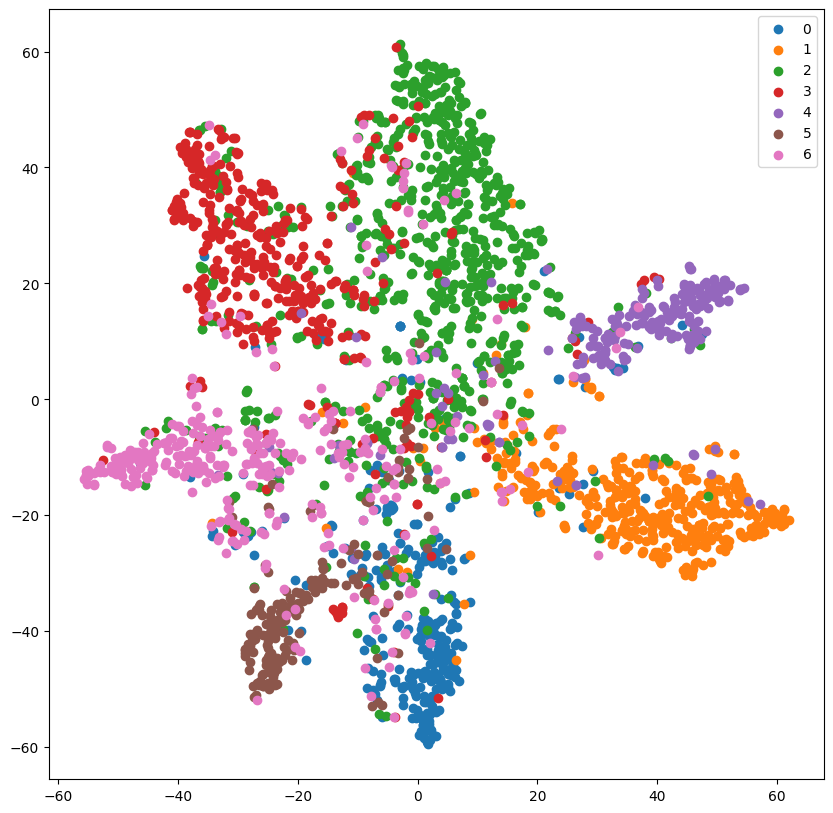

In [33]:
#Get the hidden layer representation after the first GCN layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict([X,A],batch_size=N)

#Get t-SNE Representation
x_tsne = TSNE(n_components=2).fit_transform(activations[3]) 

def plot_tSNE(labels_encoded,x_tsne):
    color_map = np.argmax(labels_encoded, axis=1)
    plt.figure(figsize=(10,10))
    for cl in range(num_classes):
        indices = np.where(color_map==cl)
        indices = indices[0]
        plt.scatter(x_tsne[indices,0], x_tsne[indices, 1], label=cl)
    plt.legend()
    plt.show()
    
plot_tSNE(labels_encoded,x_tsne)

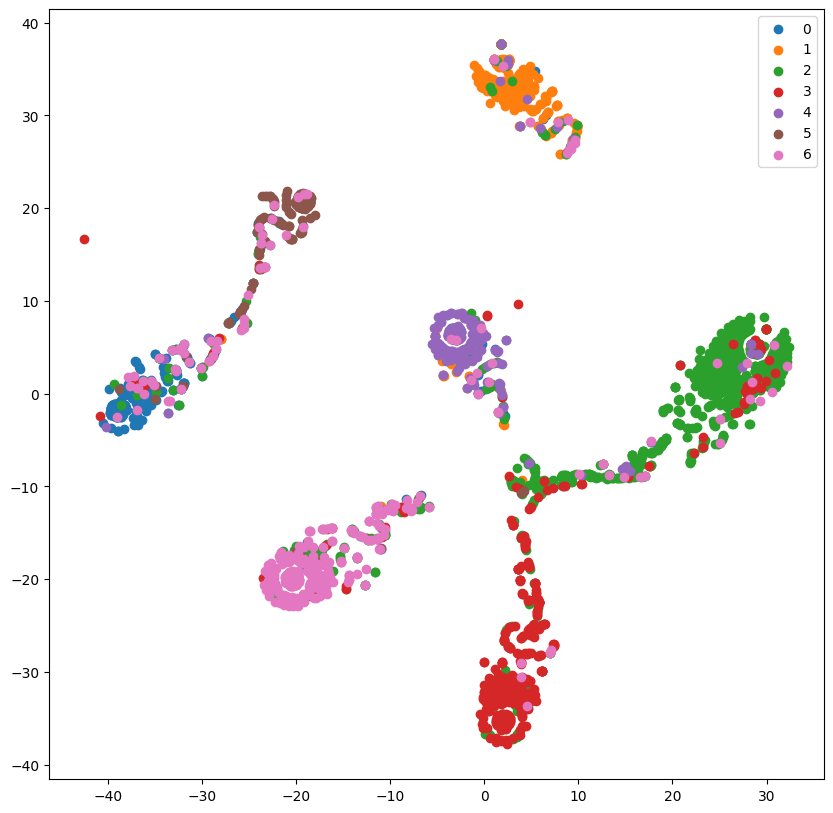

In [34]:
#Get the hidden layer representation after the second GCN layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict([X,A],batch_size=N)

#Get t-SNE Representation
x_tsne = TSNE(n_components=2).fit_transform(activations[-1]) 

def plot_tSNE(labels_encoded,x_tsne):
    color_map = np.argmax(labels_encoded, axis=1)
    plt.figure(figsize=(10,10))
    for cl in range(num_classes):
        indices = np.where(color_map==cl)
        indices = indices[0]
        plt.scatter(x_tsne[indices,0], x_tsne[indices, 1], label=cl)
    plt.legend()
    plt.show()
    
plot_tSNE(labels_encoded,x_tsne)

In [15]:
print("All distributions: \n {}".format(Counter(labels)))

All distributions: 
 Counter({'Neural_Networks': 818, 'Probabilistic_Methods': 426, 'Genetic_Algorithms': 418, 'Theory': 351, 'Case_Based': 298, 'Reinforcement_Learning': 217, 'Rule_Learning': 180})


In [16]:
print("Training Data Distribution: \n{}".format(Counter([labels[i] for i in train_idx])))

Training Data Distribution: 
Counter({'Reinforcement_Learning': 20, 'Probabilistic_Methods': 20, 'Neural_Networks': 20, 'Case_Based': 20, 'Theory': 20, 'Genetic_Algorithms': 20, 'Rule_Learning': 20})


In [17]:
print("Validation Data Distribution: \n{}".format(Counter([labels[i] for i in val_idx])))

Validation Data Distribution: 
Counter({'Neural_Networks': 172, 'Genetic_Algorithms': 78, 'Probabilistic_Methods': 72, 'Theory': 63, 'Case_Based': 58, 'Reinforcement_Learning': 35, 'Rule_Learning': 22})


In [18]:
def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

In [21]:
labels_encoded.shape

(2708, 7)

In [20]:
classes

array(['Case_Based', 'Genetic_Algorithms', 'Neural_Networks',
       'Probabilistic_Methods', 'Reinforcement_Learning', 'Rule_Learning',
       'Theory'], dtype='<U22')

In [26]:
#build the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)
# print('Graph info: ', nx.info(G))

In [31]:
print("number of nodes :",len(G.nodes()))
print("number of edges",len(G.edges()))

2708
5278


In [32]:
A.shape

(2708, 2708)

In [34]:
X.shape

(2708, 1433)

In [37]:
print("Shape of node feature at starting :",F)
print("Number of nodes :",N)

Shape of node feature at starting : 1433
Number of nodes : 2708


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 1433)         0           input_15[0][0]                   
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 2708)]       0                                            
__________________________________________________________________________________________________
gcn_conv_12 (GCNConv)           (None, 16)           22944       dropout_13[0][0]                 
                                                                 input_16[0][0]             

/Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2023-04-13 22:23:46.597394: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-04-13 22:23:46.597411: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-04-13 22:23:46.597440: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [50]:
validation_data = ([X, A], labels_encoded, val_mask)
model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          callbacks=[
              EarlyStopping(patience=es_patience,  restore_best_weights=True),
              tbCallBack_GCN
          ])

Epoch 1/200


2023-04-13 22:24:15.097336: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1/1 [==============================] - 1s 1s/step - loss: 0.1055 - acc: 0.0929 - val_loss: 0.3590 - val_acc: 0.1660
Epoch 2/200
1/1 [==============================] - 0s 197ms/step - loss: 0.0979 - acc: 0.2714 - val_loss: 0.3499 - val_acc: 0.2440


2023-04-13 22:24:16.035525: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-04-13 22:24:16.035539: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-04-13 22:24:16.097957: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-04-13 22:24:16.120787: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-04-13 22:24:16.141982: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./Tensorboard_GCN_cora/train/plugins/profile/2023_04_13_22_24_16

2023-04-13 22:24:16.149859: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./Tensorboard_GCN_cora/train/plugins/profile/2023_04_13_22_24_16/Abisheks-MacBook-Pro.local.trace.json.gz
2023-04-13 22:24:16.163744: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./Tensorboard_GCN_cora/trai

Epoch 3/200
1/1 [==============================] - 0s 126ms/step - loss: 0.0867 - acc: 0.4286 - val_loss: 0.3407 - val_acc: 0.3220
Epoch 4/200
1/1 [==============================] - 0s 100ms/step - loss: 0.0812 - acc: 0.4714 - val_loss: 0.3314 - val_acc: 0.3840
Epoch 5/200
1/1 [==============================] - 0s 94ms/step - loss: 0.0735 - acc: 0.5857 - val_loss: 0.3232 - val_acc: 0.4180
Epoch 6/200
1/1 [==============================] - 0s 102ms/step - loss: 0.0648 - acc: 0.6714 - val_loss: 0.3149 - val_acc: 0.4500
Epoch 7/200
1/1 [==============================] - 0s 103ms/step - loss: 0.0584 - acc: 0.7643 - val_loss: 0.3067 - val_acc: 0.4840
Epoch 8/200
1/1 [==============================] - 0s 92ms/step - loss: 0.0551 - acc: 0.7714 - val_loss: 0.2985 - val_acc: 0.5120
Epoch 9/200
1/1 [==============================] - 0s 92ms/step - loss: 0.0451 - acc: 0.8929 - val_loss: 0.2907 - val_acc: 0.5220
Epoch 10/200
1/1 [==============================] - 0s 87ms/step - loss: 0.0415 - acc:

In [58]:
# Evaluate model
X_te = X[test_mask]
A_te = A[test_mask,:][:,test_mask]
y_te = labels_encoded[test_mask]

y_pred = model.predict([X_te, A_te], batch_size=N)
report = classification_report(np.argmax(y_te,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

ValueError: in user code:

    /Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/keras/engine/input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 1 is incompatible with layer model_5: expected shape=(None, 2708), found shape=(None, 1000)


In [1]:
X_te.shape

NameError: name 'X_te' is not defined

In [53]:
A_te.shape

(1000, 1000)